
# MINERÍA DE DATOS



## Taller: Preprocesamiento

**Profesora:** Elizabeth León Guzmán

**Tema:** Preprocesamiento

**Entrega:** Entregar documento detallado del trabajo realizado y análisis respectivos.

**Equipo 4:** Paula Velosa- Johan Díaz- Fabián López  



## Actividades


In [49]:
import pandas as pd
import sklearn as skl
import numpy as np


### 1. Normalización de datos


In [50]:
X = np.array([-5.0, 23.0, 17.6, 7.23, 1.11])


Dado un conjunto de datos de una dimensión
**X = {-5.0, 23.0, 17.6, 7.23, 1.11}**, normalizar usando:

* a) Min-max normalización en el intervalo \[0,1]


In [51]:
min_max_0_1 = (X-X.min())/(X.max()-X.min())

* b) Min-max normalización en el intervalo \[-1,1]


In [52]:
min_max_m1_1 = 2*(X-X.min())/(X.max()-X.min())-1

* c) Normalización usando desviación estándar


In [53]:
norm_by_std = (X-X.mean())/X.std()

* d) Escala decimal en el intervalo \[-1,1]


In [54]:
dec_scale=X/(X**(np.ceil(np.log10(X.max()))))

* e) Comparar los resultados y discutir ventajas y desventajas


---

### 2. Valores perdidos

Dado un conjunto de datos de 4 dimensiones con valores perdidos:

```
I1 I2 I3 I4  
0  1  1  2  
2  1  ?  1  
1  ?  ?  0  
?  2  1  ?  
2  2  1  0
```

* a) Dado que el dominio para todos los atributos es \[0,1,2], ¿cuál debe ser el número de ejemplos “artificiales” si los valores perdidos son interpretados como “no importa el valor” y ellos son reemplazados con todos los posibles valores para su dominio?
* b) ¿Qué otro método utilizaría para reemplazar los valores perdidos?



---

### 3. Outliers en número de hijos

El número de hijos de diferentes pacientes es dado por el siguiente vector:
**C = {3, 1, 0, 2, 7, 3, 6, 4, -2, 0, 0, 10, 15, 6}**


In [55]:
C = np.array([3, 1, 0, 2, 7, 3, 6, 4, -2, 0, 0, 10, 15, 6])


* a) Encontrar outliers usando parámetros estadísticos estándar: media y varianza


In [56]:
C_normalized = (C-C.mean())/C.std()
C_normalized

array([-0.21030754, -0.66327761, -0.88976265, -0.43679257,  0.69563262,
       -0.21030754,  0.46914758,  0.0161775 , -1.34273272, -0.88976265,
       -0.88976265,  1.37508773,  2.50751292,  0.46914758])

In [57]:
C[abs(C_normalized)>3]

array([], dtype=int64)

* b) Si el umbral cambia de ±3 desviaciones estándar a ±2 desviaciones estándar, ¿cuál “outlier adicional” se encuentra?


In [58]:
C[abs(C_normalized)>2]

array([15])


---

### 4. Detección de outliers multivariados

Dado un conjunto de tres dimensiones:

```
X = [{1,2,0},{3,1,4},{2,1,5},{0,1,6},{2,4,3},{4,4,2},{5,2,1},{7,7,7},{0,0,0},{3,3,3}]
```


In [59]:
X = np.array([[1,2,0],[3,1,4],[2,1,5],[0,1,6],[2,4,3],[4,4,2],[5,2,1],[7,7,7],[0,0,0],[3,3,3]])
X

array([[1, 2, 0],
       [3, 1, 4],
       [2, 1, 5],
       [0, 1, 6],
       [2, 4, 3],
       [4, 4, 2],
       [5, 2, 1],
       [7, 7, 7],
       [0, 0, 0],
       [3, 3, 3]])


* a) Describir el procedimiento e interpretar los resultados de detección de outliers basado en la media y varianza

    Se propone realizar PCA de un único componente tal que sobre este se puedan aplicar una técninca unidimensional de detección de outliers.


In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_pca = pca.fit_transform(X)

x_pca


array([[-3.01860763],
       [-0.19030271],
       [-0.24505936],
       [-0.903921  ],
       [ 0.38813939],
       [ 1.04700104],
       [-0.05283928],
       [ 7.33795324],
       [-4.7773096 ],
       [ 0.41494591]])

In [61]:
x_pca_normalized = (x_pca-x_pca.mean())/x_pca.std()
x_pca_normalized

array([[-1.01690579],
       [-0.064109  ],
       [-0.08255537],
       [-0.30451209],
       [ 0.13075604],
       [ 0.35271276],
       [-0.01780045],
       [ 2.47200301],
       [-1.60937571],
       [ 0.1397866 ]])

Sobre nuestros nuevos datos unidimensionales realizamos detección de outliers mediante desviación estándar. El criterio será **más de 2 desviaciones estándar**.

In [62]:
x_pca_normalized_br,_ = np.broadcast_arrays(x_pca_normalized,X)

X[(abs(x_pca_normalized_br)>2)]

array([7, 7, 7])

# 5. Weka: valores perdidos, normalización y discretización

Usar el conjunto de datos *iris* en Weka:

* a) Eliminar manualmente valores (15%) en sus atributos para simular valores perdidos. Luego aplicar varios métodos disponibles en Weka para reemplazar esos valores. Discutir:

  * Diferencias entre el valor real y el que lo reemplaza
  * Diferencias entre los métodos
* b) Normalizar usando varios métodos
* c) Discretizar usando varios métodos


In [63]:
from sklearn.datasets import load_iris

In [64]:
iris = load_iris(as_frame=True)
df   = iris.frame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### valores perdidos


In [65]:
# Eliminar manualmente valores (15%) de los atributos de iris
np.random.seed(42) # for reproducibility
missing_percentage = 0.15
n_elements = df.size
n_missing = int(n_elements * missing_percentage)

# Get random indices to set to NaN
missing_indices = np.random.choice(n_elements, n_missing, replace=False)

# Flatten the DataFrame to a numpy array, set values to NaN, then reshape
df_iris_missing = df.values.flatten()
df_iris_missing[missing_indices] = np.nan
df_iris_missing = df_iris_missing.reshape(df.shape)

# Create a new DataFrame with missing values
df_iris_missing = pd.DataFrame(df_iris_missing, columns=df.columns)



In [66]:
# Reemplazando los datos con la media del atributo
df_iris_missing_replaced_mean = df_iris_missing.fillna(df_iris_missing.mean())
df_iris_missing_replaced_mean.head()
df_iris_missing_replaced_mean.info()
df_iris_missing_replaced_mean.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [67]:
# Usando regresión para predecir los datos faltantes
"""
IterativeImputer de scikit-learn usando regresión lineal
para predecir cada valor faltante. El imputador localiza de manera automática
TODAS las celdas que contienen ``np.nan`` en las columnas numéricas (parámetro
``missing_values=np.nan`` por defecto). Para cada columna con huecos:

1. Entrena un modelo de regresión lineal usando las filas donde esa columna
   **NO** es ``NaN``, tomando como variables predictoras las demás columnas.
2. Predice los valores donde **SÍ** es ``NaN`` y reemplaza esos huecos.
3. Repite el proceso ``max_iter`` veces (aquí 10) refinando las estimaciones.
"""

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

df_iris_missing_predicted_regression = df_iris_missing.copy()

# columnas numéricas
numerical_cols = df_iris_missing.select_dtypes(include=np.number).columns

# Creamos el imputador; por defecto detectará ``np.nan`` y llenará los huecos
imputer = IterativeImputer(
    estimator=LinearRegression(),  # modelo que predecirá cada valor faltante
    max_iter=10,                  # número de rondas de refinamiento MICE
    random_state=0,               # reproducibilidad
    # missing_values=np.nan       # valor que señala los huecos (default)
)


# Fit y transform de las columnas numéricas
df_iris_missing_predicted_regression[numerical_cols] = imputer.fit_transform(df_iris_missing_predicted_regression[numerical_cols])


print(df_iris_missing_predicted_regression.head())
print(df_iris_missing_predicted_regression.isna().sum())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           5.100000               3.5           1.525507          0.200000   
1           4.900000               3.0           1.687826          0.200000   
2           4.702556               3.2           1.300000          0.200000   
3           4.600000               3.1           1.500000          0.200000   
4           5.000000               3.6           1.400000          0.248846   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [68]:
# Usando Decision Tree Regressor para predecir los datos faltantes
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB # Keep import for demonstration in the comment

df_iris_missing_predicted_dt = df_iris_missing.copy()

# columnas numéricas
numerical_cols = df_iris_missing_predicted_dt.select_dtypes(include=np.number).columns

# Creamos el imputador con un estimador Decision Tree Regressor
imputer_dt = IterativeImputer(
    estimator=DecisionTreeRegressor(random_state=0),  # modelo que predecirá cada valor faltante
    max_iter=10,                  # número de rondas de refinamiento MICE
    random_state=0,               # reproducibilidad
)

# Fit y transform de las columnas numéricas
df_iris_missing_predicted_dt[numerical_cols] = imputer_dt.fit_transform(df_iris_missing_predicted_dt[numerical_cols])

print(df_iris_missing_predicted_dt.head())
print(df_iris_missing_predicted_dt.isna().sum())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.7               0.2   
1                4.9               3.0                1.5               0.2   
2                4.4               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.1   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


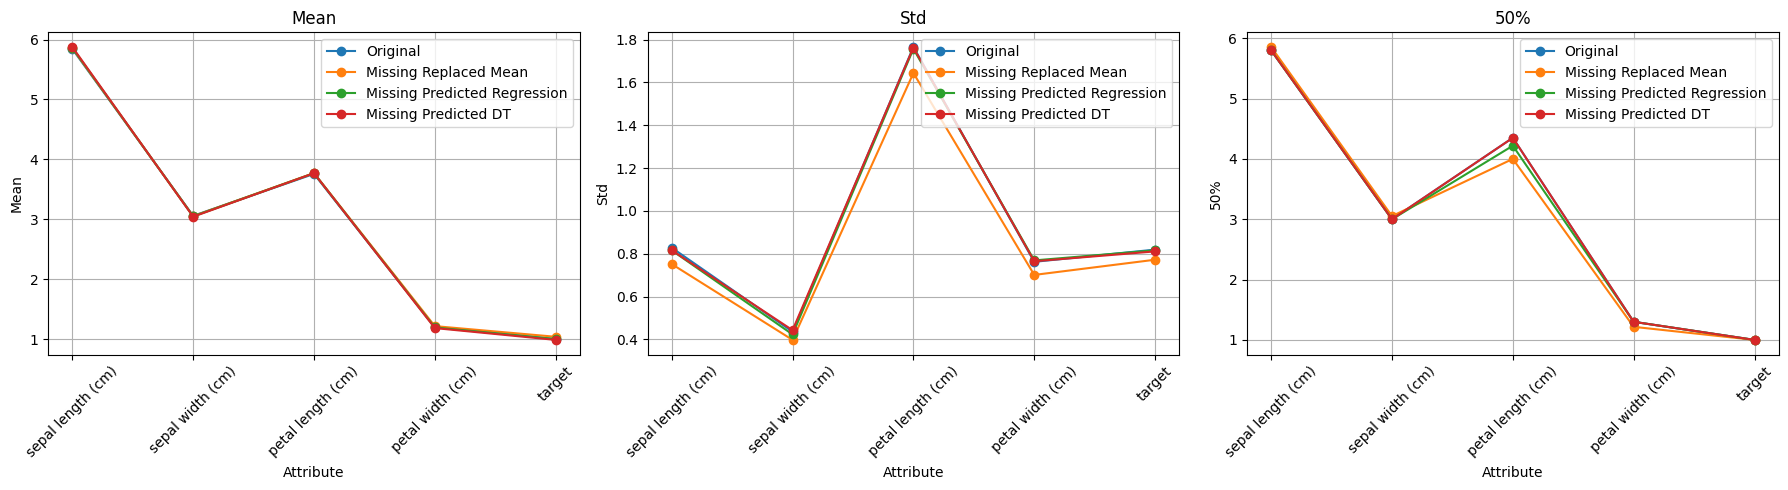

In [69]:

import matplotlib.pyplot as plt

# Get descriptive statistics for each DataFrame
desc_df = df.describe().T
desc_df_mean = df_iris_missing_replaced_mean.describe().T
desc_df_reg = df_iris_missing_predicted_regression.describe().T
desc_df_dt = df_iris_missing_predicted_dt.describe().T

# Prepare data for plotting
stats_to_plot = ['mean', 'std', '50%'] # Corresponding to 'promedio', 'std', and '50%'

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, stat in enumerate(stats_to_plot):
  ax = axes[i]
  ax.plot(desc_df.index, desc_df[stat], marker='o', linestyle='-', label='Original')
  ax.plot(desc_df_mean.index, desc_df_mean[stat], marker='o', linestyle='-', label='Missing Replaced Mean')
  ax.plot(desc_df_reg.index, desc_df_reg[stat], marker='o', linestyle='-', label='Missing Predicted Regression')
  ax.plot(desc_df_dt.index, desc_df_dt[stat], marker='o', linestyle='-', label='Missing Predicted DT')
  ax.set_title(f'{stat.capitalize()}')
  ax.set_ylabel(stat.capitalize())
  ax.set_xlabel('Attribute')
  ax.tick_params(axis='x', rotation=45)
  ax.legend()
  ax.grid(True)

plt.tight_layout()
plt.show()

### Normalización
Normalización min-max y Normalización z-score

In [70]:
#min-max

from sklearn.preprocessing import MinMaxScaler

numerical_cols = df.select_dtypes(include=np.number).columns

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()
df_min_max_scaled[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])

print("DataFrame after Min-Max Normalization:")
print(df_min_max_scaled.head())

DataFrame after Min-Max Normalization:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [71]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
z_score_scaler = StandardScaler()
df_z_score_scaled = df.copy()
df_z_score_scaled[numerical_cols] = z_score_scaler.fit_transform(df[numerical_cols])

print("\nDataFrame after Z-Score Normalization:")
print(df_z_score_scaled.head())


DataFrame after Z-Score Normalization:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

     target  
0 -1.224745  
1 -1.224745  
2 -1.224745  
3 -1.224745  
4 -1.224745  


### Discretizar
vamos a usar los tres metel de igual amplitud, igual frecuencia
y agrupación (clustering)

In [72]:
def equal_width_discretization(df, column, num_bins):
  #cut: bin valuesinto dicrete intervals
  return pd.cut(df[column], bins=num_bins, labels=False, include_lowest=True)

equal_width_df = df.copy()
equal_width_df['sepal length (cm)_ewd'] = equal_width_discretization(equal_width_df, 'sepal length (cm)', num_bins=4)


print("\nDataFrame igual amplitud:")
print(equal_width_df[['sepal length (cm)', 'sepal length (cm)_ewd']].head())


DataFrame igual amplitud:
   sepal length (cm)  sepal length (cm)_ewd
0                5.1                      0
1                4.9                      0
2                4.7                      0
3                4.6                      0
4                5.0                      0


In [73]:

def equal_frequency_discretization(df, column, num_bins):
  # quantile based discretization function: qcut
  return pd.qcut(df[column], q=num_bins, labels=False, duplicates='drop')

equal_frecuency_df = df.copy()
equal_frecuency_df['sepal length (cm)_efd'] = equal_frequency_discretization(df, 'sepal length (cm)', num_bins=4)

print("\nDataFrame igual frecuencia:")
print(equal_frecuency_df[['sepal length (cm)', 'sepal length (cm)_efd']].head())


DataFrame igual frecuencia:
   sepal length (cm)  sepal length (cm)_efd
0                5.1                      0
1                4.9                      0
2                4.7                      0
3                4.6                      0
4                5.0                      0


In [74]:
from sklearn.cluster import KMeans

def clustering_discretization(df, column, num_bins):
  # Reshape the column data for KMeans
  data = df[column].values.reshape(-1, 1)
  # Initialize KMeans
  kmeans = KMeans(n_clusters=num_bins, random_state=42, n_init=10)
  # Fit KMeans and get the cluster labels
  clusters = kmeans.fit_predict(data)
  return clusters

clustering_df = df.copy()
clustering_df['sepal length (cm)_cd'] = clustering_discretization(df, 'sepal length (cm)', num_bins=4)

print("\nDataFrame using Clustering-Based Discretization:")
print(clustering_df[['sepal length (cm)', 'sepal length (cm)_cd']].head())


DataFrame using Clustering-Based Discretization:
   sepal length (cm)  sepal length (cm)_cd
0                5.1                     2
1                4.9                     2
2                4.7                     2
3                4.6                     2
4                5.0                     2


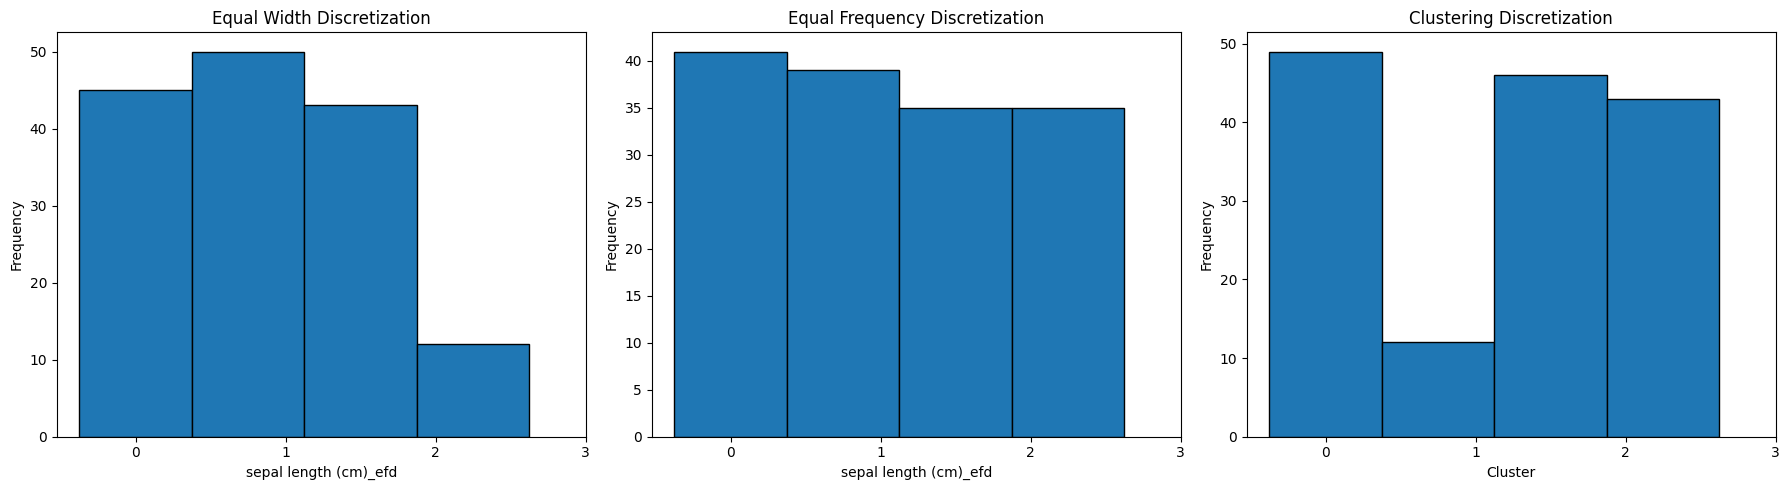

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plotting Equal Width Discretization
axes[0].hist(equal_width_df['sepal length (cm)_ewd'], bins=4, edgecolor='black', align='left')
axes[0].set_title('Equal Width Discretization')
axes[0].set_xlabel('sepal length (cm)_efd')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(range(4))

# Plotting Equal Frequency Discretization
# qcut might result in fewer bins than requested if values are not unique.
# We need to get the actual number of bins created by qcut.
actual_efd_bins = equal_frecuency_df['sepal length (cm)_efd'].nunique()
axes[1].hist(equal_frecuency_df['sepal length (cm)_efd'], bins=actual_efd_bins, edgecolor='black', align='left')
axes[1].set_title('Equal Frequency Discretization')
axes[1].set_xlabel('sepal length (cm)_efd')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(range(actual_efd_bins))


# Plotting Clustering Discretization
axes[2].hist(clustering_df['sepal length (cm)_cd'], bins=4, edgecolor='black', align='left')
axes[2].set_title('Clustering Discretization')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Frequency')
axes[2].set_xticks(range(4))


plt.tight_layout()
plt.show()


---

### 6. Reducción por binning

Dado el conjunto de datos:

```
I1  I2   I3  
1   5.9  3.4  
2   2.1  6.2  
1   1.6  2.8  
2   6.8  5.8  
1   3.1  3.1  
1   8.3  4.1  
2   2.4  5.0  
```

Realizar reducción de valores basado en la técnica de **binning** con el mejor corte:

* a) Dimensión I2 usando la **media** como representante de 2 bins
* b) Dimensión I3 usando el **límite más cercano** como representante de 2 bins
  *(Mostrar pasos)*


In [76]:
data = {'I1': [1, 2, 1, 2, 1, 1, 2],
        'I2': [5.9, 2.1, 1.6, 6.8, 3.1, 8.3, 2.4],
        'I3': [3.4, 6.2, 2.8, 5.8, 3.1, 4.1, 5.0]}
binning_df = pd.DataFrame(data)

print("Original DataFrame:")
binning_df

Original DataFrame:


,I1,I2,I3
0,1,5.9,3.4
1,2,2.1,6.2
2,1,1.6,2.8
3,2,6.8,5.8
4,1,3.1,3.1
5,1,8.3,4.1
6,2,2.4,5.0


In [77]:

# a) Dimensión I2 usando la media como representante de 2 bins

# Ordenar los datos
binning_df_sorted_i2 = binning_df.sort_values(by='I2').reset_index(drop=True)

num_bins = 2 #2 bins
bin_size = len(binning_df_sorted_i2) // num_bins


binning_df_sorted_i2['I2_bin'] = pd.cut(binning_df_sorted_i2['I2'], bins=num_bins, labels=False, include_lowest=True)

# Create a temporary sorted df with bin assignments to calculate means
temp_sorted_df = binning_df.sort_values(by='I2').reset_index()
temp_sorted_df['I2_bin'] = pd.cut(temp_sorted_df['I2'], bins=num_bins, labels=False, include_lowest=True)

# calcula el promedio para cada bin
bin_means_i2 = temp_sorted_df.groupby('I2_bin')['I2'].transform('mean')

# Create a mapping from original index to bin mean
index_to_bin_mean = temp_sorted_df.set_index('index')['I2_bin'].apply(lambda x: bin_means_i2[temp_sorted_df['I2_bin'] == x].iloc[0])

# Apply the mapping to the original dataframe
binning_df['I2_binned_mean'] = binning_df.index.map(index_to_bin_mean)


print("\nDataFrame usando Binning en I2 con representante Promedio:")
binning_df


DataFrame usando Binning en I2 con representante Promedio:


,I1,I2,I3,I2_binned_mean
0,1,5.9,3.4,7.0
1,2,2.1,6.2,2.3
2,1,1.6,2.8,2.3
3,2,6.8,5.8,7.0
4,1,3.1,3.1,2.3
5,1,8.3,4.1,7.0
6,2,2.4,5.0,2.3


In [80]:
# b) Dimensión I3 usando el límite más cercano como representante de 2 bins

# 1) Calcula los bordes de los bins (2 bins) de I3
_, bin_edges = pd.cut(
    binning_df['I3'],
    bins=num_bins,
    labels=False,
    include_lowest=True,
    retbins=True # importante porque este trae los límitos
)

# 2) Función que, dado un valor x, devuelve el límite más cercano
def nearest_boundary(x, edges):
    # np.searchsorted te dice dónde insertarlo para mantener orden
    idx = np.searchsorted(edges, x, side='right')
    lower = edges[idx-1] if idx > 0 else edges[0]
    upper = edges[idx] if idx < len(edges) else edges[-1]
    # elige el más cercano y redondea a 2 decimales
    return round(lower if abs(x - lower) <= abs(x - upper) else upper, 2)

# 3) Aplica vectorizado con .apply
binning_df['I3_binned_boundary'] = binning_df['I3'].apply(
    lambda x: nearest_boundary(x, bin_edges)
)

print("\nDataFrame usando Binning en I3 con representante Nearest Boundary:")
print(binning_df)



DataFrame usando Binning en I3 con representante Nearest Boundary:
   I1   I2   I3  I2_binned_mean  I3_binned_boundary
0   1  5.9  3.4             7.0                 2.8
1   2  2.1  6.2             2.3                 6.2
2   1  1.6  2.8             2.3                 2.8
3   2  6.8  5.8             7.0                 6.2
4   1  3.1  3.1             2.3                 2.8
5   1  8.3  4.1             7.0                 4.5
6   2  2.4  5.0             2.3                 4.5



---

### 7. Ranking de dimensiones

Dado el conjunto de datos con tres dimensiones de entrada y una clase:

```
I1   I2   I3   C  
2.5  1.6  5.9  0  
7.2  4.3  2.1  1  
3.4  5.8  1.6  1  
5.6  3.6  6.8  0  
4.8  7.2  3.1  1  
8.1  4.9  8.3  0  
6.3  4.8  2.4  1  
```

* Realizar **ranking** de las dimensiones comparando medias y varianzas


In [83]:
data = {'I1': [2.5, 7.2, 3.4, 5.6, 4.8, 8.1, 6.3],
        'I2': [1.6, 4.3, 5.8, 3.6, 7.2, 4.9, 4.8],
        'I3': [5.9, 2.1, 1.6, 6.8, 3.1, 8.3, 2.4],
        'C': [0, 1, 1, 0, 1, 0, 1]}

ranking_df = pd.DataFrame(data)

class_0_df = ranking_df[ranking_df['C'] == 0].drop(columns=['C'])
class_1_df = ranking_df[ranking_df['C'] == 1].drop(columns=['C'])

# Calcular para cada cclase
mean_0 = class_0_df.mean()
mean_1 = class_1_df.mean()
var_0 = class_0_df.var()
var_1 = class_1_df.var()

ranking_table_data = []
for dim in ranking_df.columns[:-1]:
  ranking_table_data.append([
      dim,
      mean_0[dim],
      mean_1[dim],
      var_0[dim],
      var_1[dim],
      None, # Score placeholder
      None  # Ranking placeholder
  ])

ranking_table_df = pd.DataFrame(ranking_table_data, columns=['Dimensión', 'μ₀', 'μ₁', 'σ²₀', 'σ²₁', 'Score', 'Ranking'])


# Calculate scores: |μ₀ - μ₁| / (σ₀ + σ₁)
# Handle potential division by zero if variance is 0. Add a small epsilon.
epsilon = 1e-9
ranking_table_df['Score'] = abs(ranking_table_df['μ₀'] - ranking_table_df['μ₁']) / (np.sqrt(ranking_table_df['σ²₀']) + np.sqrt(ranking_table_df['σ²₁']) + epsilon)

ranking_table_df = ranking_table_df.sort_values(by='Score', ascending=False).reset_index(drop=True)
ranking_table_df['Ranking'] = ranking_table_df.index + 1

print("Ranking Table:")
ranking_table_df

Ranking Table:


,Dimensión,μ₀,μ₁,σ²₀,σ²₁,Score,Ranking
0,I3,7.000000,2.300,1.470000,0.393333,2.554905,1
1,I2,3.366667,5.525,2.763333,1.635833,0.733796,2
2,I1,5.400000,5.425,7.870000,2.802500,0.005581,3


Conclusión:

I3 es la dimensión más relevante ya que tendría una Diferencia grande de promedios y datos poco “esparcidos” (poca diferencia de std's) ⇒ mejor para distinguir las clases..

I2 tiene utilidad intermedia (Ranking 2).

I1 prácticamente no ayuda a distinguir entre las clases (Ranking 3).


---

### 8. Selección de características por entropía

Dado el conjunto de datos donde **X1** y **X2** son numéricas, y **X3** y **X4** categóricas:

```
X1  X2  X3  X4  
2.7 3.4 1   A  
3.1 6.2 2   A  
4.5 2.8 1   B  
5.3 5.8 2   B  
6.6 3.1 1   A  
5.0 4.1 2   B  
```

* a) Aplicar el método de **selección de características basado en entropía** para reducir una dimensión (mostrar pasos)
* b) Implementar un programa para realizar el **ranking de dimensiones** usando entropía



---

### 9. Transformación de atributos en *Adult dataset*

Aplicar al conjunto de datos *Adult* del repositorio de Machine Learning:

* a) Convertir todos los atributos numéricos a categóricos utilizando dos estrategias diferentes
* b) Transformar el conjunto de datos para que **todos los atributos sean numéricos**



---

### 10. PCA en conjunto de datos numéricos

Escoger un conjunto de datos del repositorio de Machine Learning que tenga varias dimensiones numéricas y aplicar **PCA**.

* Describir el nuevo conjunto de datos resultante

